In [1]:
# NOTE using another conda env, different from the project's one!!!

In [2]:
!pip install -q lxml

In [3]:
import pandas as pd

df_hf = pd.read_html("https://huggingface.co/languages")[0]
df_wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_languages_by_total_number_of_speakers")[0]

In [4]:
df_hf.head(40)

,Language,ISO code,Datasets,Models
0,English English,en,16828,93315
1,Chinese 中文,zh,1731,6552
2,French Français,fr,1641,6249
3,Spanish Español,es,1293,5518
4,Russian Русский,ru,1107,3427
5,German Deutsch,de,1045,5708
6,Japanese 日本語,ja,1013,4513
7,Portuguese Português,pt,825,3842
8,Korean 한국어,ko,811,3989
9,Arabic اللغة العربية,ar,783,2415


In [5]:
df_wiki.head(2)

,Language,Family,Branch,First-language (L1) speakers,Second-language (L2) speakers,Total speakers (L1+L2)
0,English (excl. creole languages),Indo-European,Germanic,380 million,1.135 billion,1.515 billion
1,"Mandarin Chinese (incl. Standard Chinese, but ...",Sino-Tibetan,Sinitic,941 million,199 million,1.140 billion


In [6]:
lang2iso = {
    "English": "en",
    "Mandarin Chinese": "zh",
    "Hindi": "hi",
    "Spanish": "es",
    "French": "fr",
    "Standard Arabic": "ar",
    "Modern Standard Arabic": "ar",
    "Bengali": "bn",
    "Russian": "ru",
    "Portuguese": "pt",
    "Urdu": "ur",
    "Indonesian": "id",
    "German": "de",
    "Standard German": "de",
    "Japanese": "ja",
    "Swahili": "sw",
    "Marathi": "mr",
    "Telugu": "te",
    "Western Punjabi": "pa",
    "Wu Chinese": "wuu",
    "Tamil": "ta",
    "Korean": "ko",
    "Turkish": "tr",
    "Yue Chinese": "yue",
    "Vietnamese": "vi",
    "Italian": "it",
    "Egyptian Arabic": "arz",
    "Javanese": "jv",
    "Hausa": "ha",
    "Thai": "th",
    "Gujarati": "gu",
    "Kannada": "kn",
    "Polish": "pl",
    "Pushto": "ps",
    "Xiang Chinese": "hsn",
    "Malayalam": "ml",
    "Odia": "or",
    "Maithili": "mai",
    "Burmese": "my",
    "Sunda": "su",
    "Hausa": "ha",
    "Somali": "so",
    "Amharic": "am",
    "Magahi": "mag",
    "Nepali": "ne",
    "Sinhala": "si",
    "Khmer": "km",
    "Chhattisgarhi": "hne",
    "Assamese": "as",
    "Madurese": "mad",
    "Santali": "sat",
    "Kurdish": "ku",
    "Zhuang": "za",
    "Greek": "el",
    "Czech": "cs",
    "Uyghur": "ug",
    "Haitian Creole": "ht",
    "Shona": "sn",
    "Zulu": "zu",
    "Tajik": "tg",
    "Tatar": "tt",
    "Serbo-Croatian": "sh",
    "Kazakh": "kk",
    "Dari": "prs",
    "Uighur": "ug",
    "Swedish": "sv",
    "Hmong": "hmn",
    "Azerbaijani": "az",
    "Kinyarwanda": "rw",
    "Afrikaans": "af",
    "Tigrinya": "ti",
    "Luganda": "lg",
    "Hebrew": "he",
    "Belarusian": "be",
    "Yoruba": "yo",
    "Uzbek": "uz",
    "Quechua": "qu",
    "Welsh": "cy",
    "Irish": "ga",
    "Scots Gaelic": "gd",
    "Nigerian Pidgin": "pcm",
    "Tagalog[b]": "tl",
    "Iranian Persian": "pes",
    "Bhojpuri": "bho",
    "Min Nan Chinese": "nan",
    "Levantine Arabic": "apc",
    # Not found: Eastern Punjabi, Jin Chinese
}


In [7]:
# Remove everything between parentheses:
df_wiki["lang"] = df_wiki["Language"].str.replace(r"\(.*\)", "", regex=True).str.strip()
df_wiki["iso"] = df_wiki["lang"].map(lang2iso)
df_wiki[['Language', 'lang', 'iso']].loc[df_wiki['iso'].isnull()]

,Language,lang,iso


In [8]:
# Merge:
df = df_wiki.drop(columns=["Language"]).merge(df_hf, left_on="iso", right_on="ISO code", how="inner")
df["Total speakers (L1+L2)"] = (
    df["Total speakers (L1+L2)"]
        .str.replace(r"\[.*\]", "", regex=True)
        .str.replace(" million", "*1e6")
        .str.replace(" billion", "*1e9")
        .map(eval)
)
df["First-language (L1) speakers"] = (
    df["First-language (L1) speakers"]
        .str.replace(r"\[.*\]", "", regex=True)
        .str.replace("—", "0")
        .str.replace(" million", "*1e6")
        .str.replace(" billion", "*1e9")
        .map(eval)
)

df["Total speakers (L1+L2)"] = df["Total speakers (L1+L2)"] / 1e6
df["First-language (L1) speakers"] = df["First-language (L1) speakers"] / 1e6


In [9]:
df.head(2)

,Family,Branch,First-language (L1) speakers,Second-language (L2) speakers,Total speakers (L1+L2),lang,iso,Language,ISO code,Datasets,Models
0,Indo-European,Germanic,380.0,1.135 billion,1515.0,English,en,English English,en,16828,93315
1,Sino-Tibetan,Sinitic,941.0,199 million,1140.0,Mandarin Chinese,zh,Chinese 中文,zh,1731,6552


In [12]:
# !pip install -qU plotnine

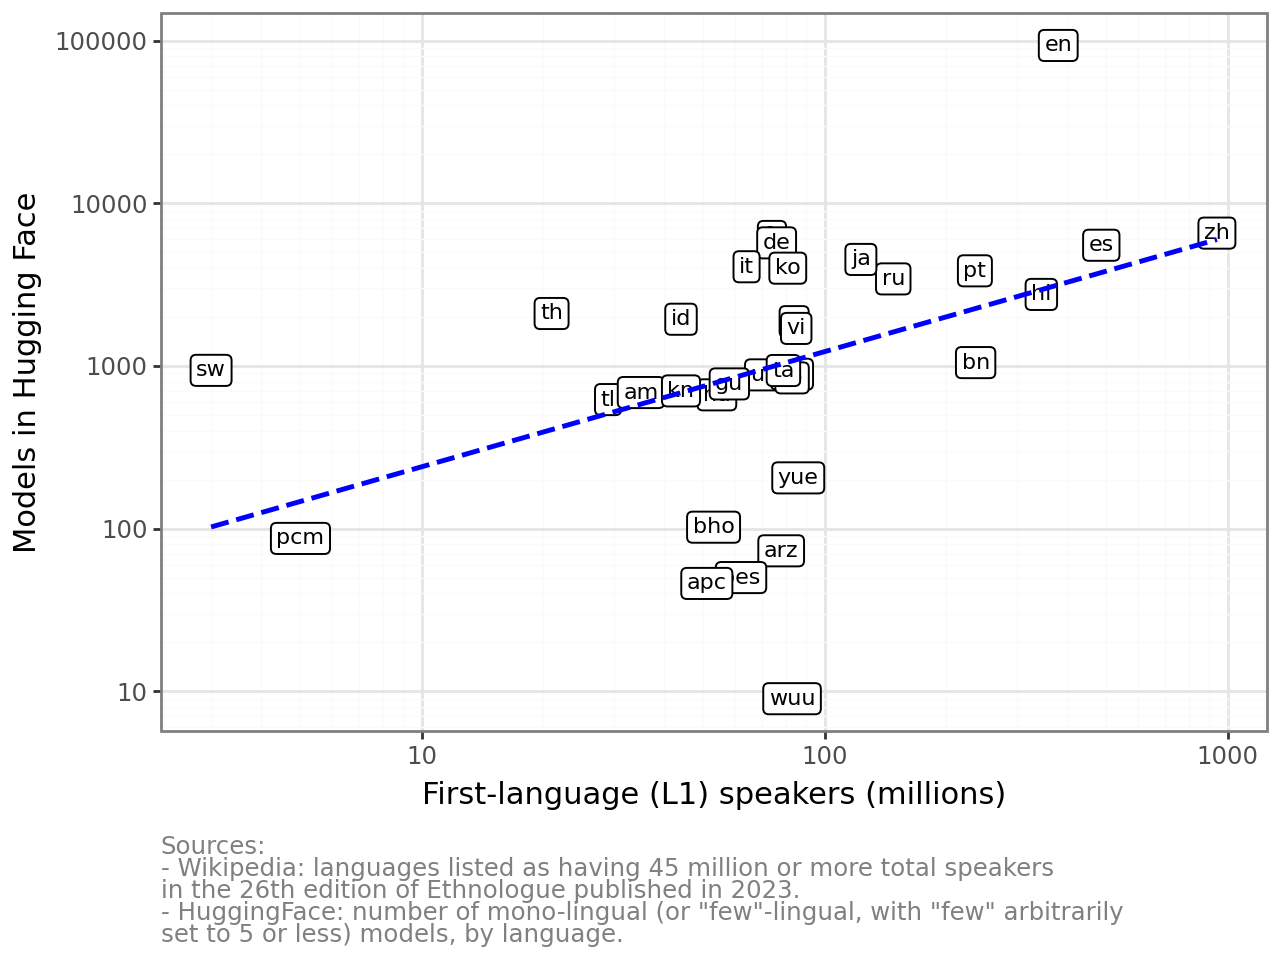

In [16]:
import plotnine as p9

x = "First-language (L1) speakers"
# x = "Total speakers (L1+L2)"
y = "Models"
# y = "Datasets"

caption = (
    f'Sources:'
    f'\n- Wikipedia: languages listed as having 45 million or more total speakers'
    f'\nin the 26th edition of Ethnologue published in 2023.'
    f'\n- HuggingFace: number of mono-lingual (or "few"-lingual, with "few" arbitrarily'
    f'\nset to 5 or less) {y.lower()}, by language.'
)

df_tmp = df[[x, y, "iso"]].dropna()
df_tmp = df_tmp.loc[df_tmp[x] > 0]
# remove english:
# df_tmp = df_tmp.loc[df_tmp["iso"] != "en"]

p = (
    p9.ggplot(df_tmp, p9.aes(x=x, y=y))
    + p9.geom_label(p9.aes(label="iso"), size=8)
    # + p9.geom_point(size=3, alpha=0.5, color="red", shape="x")
    # + p9.geom_smooth(linetype="dashed", color="blue")
    + p9.geom_smooth(method="lm", linetype="dashed", color="blue", se=False)
    + p9.scale_x_log10()
    + p9.scale_y_log10(labels=lambda l: ["%.0f" % (v) for v in l])
    + p9.theme_bw()
    + p9.theme(
        plot_caption=p9.element_text(hjust=0, ha="left", margin={"t": 1, "units": "lines"}, color="gray"),
    )
    + p9.labs(x=f"{x} (millions)", y=f"{y} in Hugging Face", caption=caption)
)
p